# This program is used to plot the results of the experiment 1 (when we masured more sampling points of traffic load) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import glob

## Input filename of CSV file : CPU utilization

In [2]:
## Find start row index of itteration
def getStartEndID(df,start_data,end_data):
    """
    to clean dataframe and return the data with new header
    Input: 
        df : datafram without header of txt file 
    Output
        strat_indices_list : start indices list
    """
    # creating and passing series to new column
    df["Start"]= df[2].str.find(start_data)
    df["End"]= df[2].str.find(end_data)

    index = df.index
    strat_indices = index[df["Start"]==0.0]
    strat_indices_list = strat_indices.tolist()
    end_indices = index[df["End"]==0.0]
    end_indices_list = end_indices.tolist()
    
    
    return strat_indices_list, end_indices_list
    

In [3]:
def readCSV2pd_CPU(directoryPath,tf_load,edge_name):
    """
    This function is to read a CSV file and return the average value and varience
    input: directoryPath : path of file names
            tf_load : list of traffic load
    """
    avg_cpu = []
    var_cpu = []
    for tf in tf_load:
        cpu_data = pd.DataFrame()
        for file_name in glob.glob(directoryPath+edge_name+str(tf)+'.csv'):
            print(file_name)
            x = pd.read_csv(file_name, low_memory=False)
            cpu_data = pd.concat([cpu_data,x],axis=0)
            cpu_mean = cpu_data.mean(axis=0)
            cpu_var = cpu_data.var(axis=0)
            avg_cpu.append(cpu_mean['percentage_cpu_utilisation'])
            var_cpu.append(cpu_var['percentage_cpu_utilisation'])
    return avg_cpu, var_cpu

In [4]:
directoryPath = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/"

In [5]:
tf_load  = [i*2 for i in range(1,20)]
edge_name = 'edge1CPU_M'
avg_cpu, var_cpu = readCSV2pd_CPU(directoryPath,tf_load,edge_name)



/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/edge1CPU_M2.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/edge1CPU_M4.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/edge1CPU_M6.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/edge1CPU_M8.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_CPU/edge1CPU_M10.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_test

In [6]:
directoryPath_2 = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/"

In [7]:
edge_name2 = 'edge2CPU_M' 
avg_cpu_edge2, var_cpu_edge2 = readCSV2pd_CPU(directoryPath_2,tf_load,edge_name2)
print(avg_cpu_edge2)

/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/edge2CPU_M2.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/edge2CPU_M4.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/edge2CPU_M6.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/edge2CPU_M8.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_CPU/edge2CPU_M10.csv
/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_test

## Plot

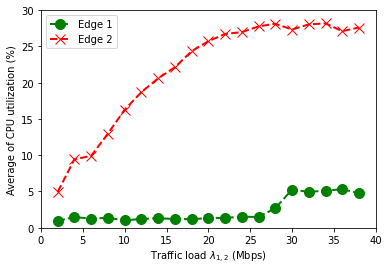

In [8]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)


ax.plot(tf_load, avg_cpu, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,label="Edge 1")
ax.plot(tf_load, avg_cpu_edge2, color='red', linestyle='dashed', linewidth = 2,
         marker='x', markerfacecolor='red', markersize=10,label="Edge 2")
plt.ylim(0,30)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{1,2}$ (Mbps)')
# naming the y axis
plt.ylabel('Average of CPU utilization (%)')

plt.legend()

plt.show()
 

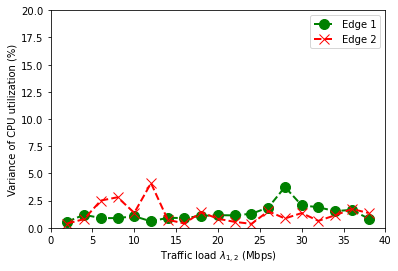

In [9]:

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(tf_load, var_cpu, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,label="Edge 1")

ax.plot(tf_load, var_cpu_edge2, color='red', linestyle='dashed', linewidth = 2,
         marker='x', markerfacecolor='red', markersize=10,label="Edge 2")

plt.ylim(0,20)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{1,2}$ (Mbps)')
# naming the y axis
plt.ylabel('Variance of CPU utilization (%)')

plt.legend()

plt.show()
 

## Function for CSV files of Throughput from Iperf log

In [10]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    This functions will import the data from txt file and return the dataframe without the header of txt file.
    Input: 
        measurement_interval = 30 (sec) : 
        header_range = 10 lines
        start_row = 0 
    Return: 
        df1t : dataframe of througput and jitter
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [11]:
def readCSV2pd_Thru(directoryPath,tf_load,edge_name):
    """
    This function is to read a CSV file and return the average value and varience of Thruoughput
    input: directoryPath : path of file names
            tf_load : list of traffic load
            
    """
    avg_thru = []
    var_thru = []
    for tf in tf_load:
        df = pd.DataFrame()
        for file_name in glob.glob(directoryPath+edge_name+str(tf)+'.csv'):
            x = pd.read_csv(file_name,skip_blank_lines=True,header=None)     
            measurement_interval = 60
            start_row = 0
            header_range =1
            df =getDataframeThru(x,start_row,measurement_interval,header_range)
            df.rename({0 :'Interval', 1 : 'Unit', 2 :'Transfer', 3 :'Unit Byte', 4 :'Bitrate', 5: 'Unit bps', 6:'Total Datagrams'}, axis=1, inplace=True)

            df['Bitrate'] = pd.to_numeric(df['Bitrate'], errors='coerce',downcast="float")
            Throughput = []
            for i in range(1,df['Unit bps'].shape[0]):
                if df['Unit bps'].loc[i] == 'Kbits/sec':
                    Throughput.append(df['Bitrate'].loc[i]*1e-3)
                elif df['Unit bps'].loc[i] == 'Mbits/sec':
                    Throughput.append(df['Bitrate'].loc[i])
                else:
                     pass   
            Thr = np.asarray(Throughput)
            avg_thru.append(Thr.mean())
        
            
    return avg_thru

## Run Function

In [12]:
directoryPath_thru_edge1 = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge1_Iperf_log/"

In [13]:
edge_name = 'edge1_M'
avg_thru_edge1 = readCSV2pd_Thru(directoryPath_thru_edge1,tf_load,edge_name )

In [14]:
directoryPath_thru_edge2 = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version2_Experiment_style/Experiment1_updated_testingFrequency/Edge2_Iperf_log/"

In [15]:
edge_name = 'edge2_M'
avg_thru_edge2 = readCSV2pd_Thru(directoryPath_thru_edge2,tf_load,edge_name)

print(avg_thru_edge1)
print(avg_thru_edge2)

[1.9965516, 4.0031037, 5.999482, 7.9960337, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 27.036205, 28.74483, 29.663794, 28.551723, 28.303448]
[1.9965516, 4.001552, 5.9989657, 7.9987926, 9.996725, 12.0, 14.0, 15.994829, 17.993103, 19.991377, 21.986208, 23.996553, 25.998276, 27.994827, 27.012068, 28.717241, 29.62586, 28.52931, 28.274137]


## Plot Throughput

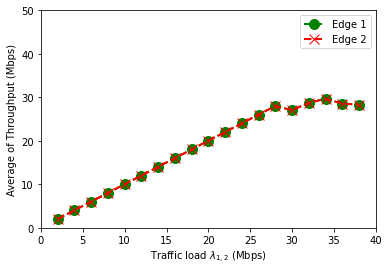

In [16]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)


ax.plot(tf_load, avg_thru_edge1, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,  label="Edge 1")

ax.plot(tf_load, avg_thru_edge2, color='red', linestyle='dashed', linewidth = 2,
         marker='x', markerfacecolor='red', markersize=10,  label="Edge 2")

plt.ylim(0,50)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{1,2}$ (Mbps)')
# naming the y axis
plt.ylabel('Average of Throughput (Mbps)')

plt.legend()

plt.show()
 